In [1]:
import os

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
from astropy.table import Table

In [7]:
LSLGAdir = os.getenv('LSLGA_DIR')
galaxies = os.path.join(LSLGAdir, 'sample', 'CleanishSample43018.fits')

In [8]:
dat = Table.read(galaxies, format='fits')
df = dat.to_pandas()
df.head()

,galaxy,objtype,ra,dec,z,zqual,morph,mag,mag_err,mag_band,d25,d25_band,ba25,ba25_band,pa,pa_band,notes
0,SDSS J025901.06+005350.3,G,44.754542,0.897278,0.134638,N/A,N/A,17.450541,NaN,r,0.377500,r,0.532,r,134.0,r,N/A
1,SDSS J025831.82+002854.7,G,44.632583,0.481889,0.193223,N/A,N/A,17.678623,0.149580,r,0.211500,r,0.759,r,40.0,r,N/A
2,SDSS J030022.98+010354.8,G,45.095792,1.065250,0.165026,SPEC,N/A,18.496580,0.149465,r,0.200500,r,0.615,r,167.0,r,N/A
3,SDSS J030014.73+003044.9,G,45.061417,0.512472,0.162356,SPEC,N/A,18.519279,0.184103,r,0.199500,r,0.563,r,52.0,r,N/A
4,SDSS J025910.53+004416.3,G,44.793875,0.737917,0.190430,SPEC,N/A,17.896499,0.149229,r,0.180833,r,0.929,r,31.0,r,N/A


In [9]:
np.unique(df.d25_band)

array(['B_ESO', 'B_RC3', 'Ks', 'r'], dtype=object)

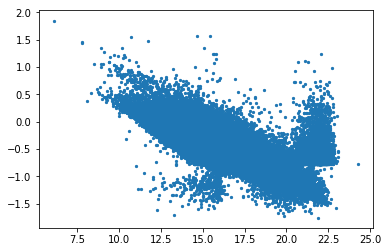

In [21]:
plt.scatter(df.mag, np.log10(df.d25), s=5)

In [51]:
beso = df[df.d25_band=='B_ESO']
brc3 = df[df.d25_band=='B_RC3']
Ks = df[df.d25_band=='Ks']
rband = df[df.d25_band=='r']
twomasx = df[df['galaxy'].str.contains('2MASX')]
sdss = df[df['galaxy'].str.contains('SDSS')]

Text(0,0.5,'$log_{10}$ Angular Diameter')

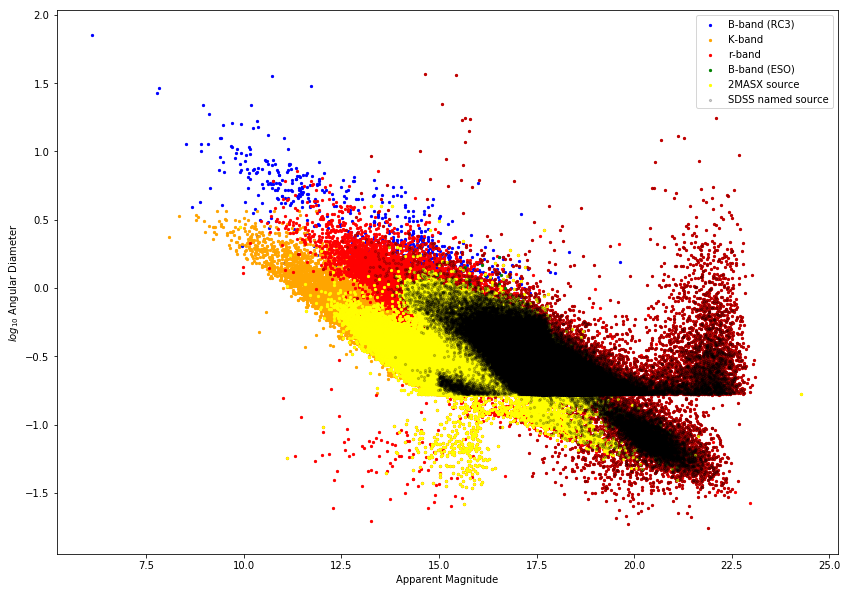

In [55]:
plt.figure(figsize=(14,10))
plt.scatter(brc3.mag, np.log10(brc3.d25), s=5, color='blue', label='B-band (RC3)')
plt.scatter(Ks.mag, np.log10(Ks.d25), s=5, color='orange', label='K-band')
plt.scatter(rband.mag, np.log10(rband.d25), s=5, color='red', label='r-band')
plt.scatter(beso.mag, np.log10(beso.d25), s=5, color='green', label='B-band (ESO)')
plt.scatter(twomasx.mag, np.log10(twomasx.d25), s=5, color='yellow', label='2MASX source')
plt.scatter(sdss.mag, np.log10(sdss.d25), s=5, color='black', alpha = 0.2, label='SDSS named source')
plt.legend()
plt.xlabel('Apparent Magnitude')
plt.ylabel(r'$log_{10}$ Angular Diameter')